## K Nearest Neighbour

#### A non-parametric supervised algorithm that classifies data points based on the majority class of the k-nearest data points in the feature space.
#### ![KNN](https://media.geeksforgeeks.org/wp-content/uploads/20200616145419/Untitled2781.png)

#### Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('cleaned_housing.csv')


In [3]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
k = 5  
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)



KNeighborsRegressor()

In [7]:
y_pred = knn_model.predict(X_test_scaled)


In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [9]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 20.61
R-squared (R²): 0.72


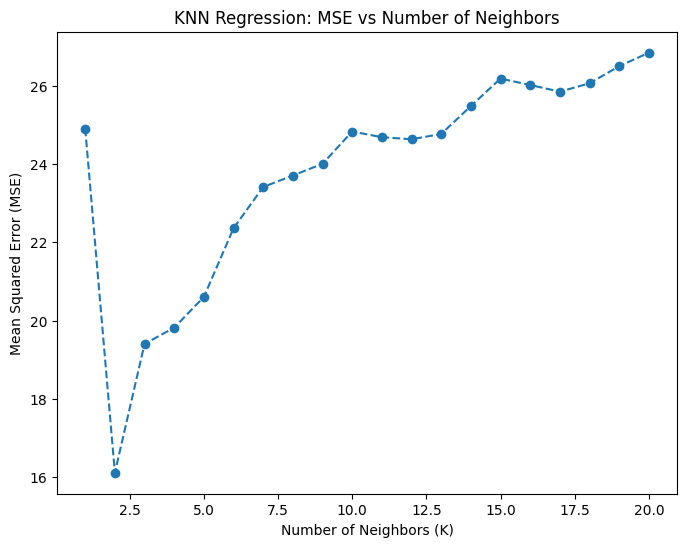

In [10]:
import matplotlib.pyplot as plt


errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    mse_k = mean_squared_error(y_test, y_pred_k)
    errors.append(mse_k)


plt.figure(figsize=(8, 6))
plt.plot(k_values, errors, marker='o', linestyle='--')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Regression: MSE vs Number of Neighbors")
plt.show()


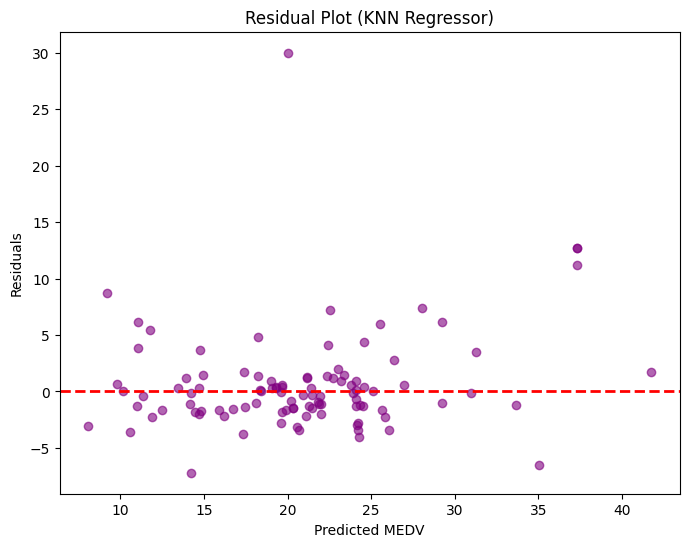

In [12]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residual Plot (KNN Regressor)")
plt.show()


#### The KNN regression model applied to the housing dataset (`MEDV`) was evaluated using multiple visualizations to understand its performance and limitations. The **residual plot** revealed how prediction errors were distributed across predicted values, showing that while the model captures general trends, deviations still exist, indicating areas for improvement. Combined with the **actual vs. predicted plot**, it is clear that KNN performs reasonably well on this dataset but struggles with complex, non-linear relationships. Proper feature scaling improved accuracy due to the distance-based nature of KNN, and further performance tuning, such as optimizing the value of `k` or incorporating feature selection, could enhance the model's predictive power.